In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the graphs as interactive.
%matplotlib inline

## Functions declared

In [3]:
def displaydf(dataframe, cols = None, rows = 20):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

In [4]:
def get_columns_str(df):
    list_columns_str = []
    for i in df.columns:
        if df[i].dtype == object:
            list_columns_str.append(i)
    print(list_columns_str)
    return list_columns_str

In [5]:
#Convert the whole columns int to float as possible
def pass_float(df):
    for i in df.columns:
        try:
            df[i] = df[i].astype(float)
        except ValueError:
            pass
    return df

In [6]:
def eliminated_columns(df,lista):
    for index in lista:
        df.remove(index) #we use a list to drop all the columns that we don't wan, by the way, we excluse the ¡Descrpcio_torn and Descripcio_cauca
    return df

## Importing Dataset

In [7]:
accidents_2019 = pd.read_csv('../data/2019_accidents_gu_bcn.csv')
accidents_2018 = pd.read_csv('../data/2018_accidents_gu_bcn.csv')
accidents_2017 = pd.read_csv('../data/2017_accidents_gu_bcn.csv')
accidents_2016 = pd.read_csv('../data/2016_accidents_gu_bcn.csv')

In [8]:
accidents = pd.concat([accidents_2019, accidents_2017,accidents_2018,accidents_2016], axis = 0)

In [9]:
accidents.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Num_postal_caption',
       'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia',
       'NK_Any', 'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia',
       'Descripcio_torn', 'Descripcio_causa_vianant', 'Numero_morts',
       'Numero_lesionats_lleus', 'Numero_lesionats_greus', 'Numero_victimes',
       'Numero_vehicles_implicats', 'Coordenada_UTM_X', 'Coordenada_UTM_Y',
       'Longitud', 'Latitud', 'Num_postal', 'Any', 'Num_postal '],
      dtype='object')

In [10]:
print(displaydf(accidents))

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal_caption,Descripcio_dia_setmana,Dia_setmana,Descripcio_tipus_dia,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud,Num_postal,Any,Num_postal
0,2019S000001,5,Sarrià-Sant Gervasi,26,Sant Gervasi - Galvany,144601,Diagonal / Augusta ...,0482 0482,Dimarts,Dm,Laboral,2019.0,1,Gener,1,1,Nit,No és causa del vianant,0,0,1,1,1,"429482,03","4583236,02",2.155236,41.395744,NaN,NaN,NaN
1,2019S000002,9,Sant Andreu,62,el Congrés i els Indians,102907,Felip II / Congrés Eucarístic ...,9999 9999,Dimarts,Dm,Laboral,2019.0,1,Gener,1,4,Nit,No és causa del vianant,0,1,0,1,2,"431582,6","4586504,13",2.179990,41.425361,NaN,NaN,NaN
2,2019S000003,10,Sant Martí,66,el Parc i la Llacuna del Poblenou,242906,Pallars ...,0111 0113,Dimarts,Dm,Laboral,2019.0,1,Gener,1,5,Nit,Creuar per fora pas de vianants,0,1,0,1,1,"432532,56","4583333,82",2.191712,41.396887,NaN,NaN,NaN
3,2019S000004,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,228803,Taxdirt / Nogués ...,0054 0054,Dimarts,Dm,Laboral,2019.0,1,Gener,1,8,Matí,No és causa del vianant,0,1,0,1,2,"430348,14","4584674,08",2.165429,41.408772,NaN,NaN,NaN
4,2019S000005,2,Eixample,7,la Dreta de l'Eixample,89004,Consell de Cent / Girona ...,0395 0397,Dimarts,Dm,Laboral,2019.0,1,Gener,1,12,Matí,No és causa del vianant,0,2,0,2,1,"430752,23","4583128,25",2.170440,41.394884,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,2016S004424,9,Sant Andreu,59,el Bon Pastor,331700,Tàrrega,NaN,Dimarts,Dm,Laboral,NaN,6,Juny,7,14,Tarda,No és causa del vianant,0,1,0,1,2,433948,4.58789e+06,2.208224,41.438003,0073 0073,2016.0,NaN
10136,2016S007061,9,Sant Andreu,59,el Bon Pastor,701204,Avançada,NaN,Divendres,Dv,Laboral,NaN,9,Setembre,16,19,Tarda,No és causa del vianant,0,1,0,1,3,434009,4.58769e+06,2.208988,41.436216,0004U0004U,2016.0,NaN
10137,2016S007197,9,Sant Andreu,59,el Bon Pastor,185052,Llinars del Vallès,NaN,Dimecres,Dc,Laboral,NaN,9,Setembre,21,12,Matí,No és causa del vianant,0,2,0,2,2,433850,4.58756e+06,2.207099,41.435077,0007B0007B,2016.0,NaN
10138,2016S000178,9,Sant Andreu,59,el Bon Pastor,318906,Santander,NaN,Dijous,Dj,Laboral,NaN,1,Gener,7,22,Nit,No és causa del vianant,0,1,0,1,2,433743,4.5872e+06,2.205846,41.431817,0090 0090,2016.0,NaN


True


## Dropping useless columns and NaN

In [11]:
accidents.isnull().sum()

Numero_expedient                 0
Codi_districte                   0
Nom_districte                    0
Codi_barri                       0
Nom_barri                        0
Codi_carrer                      0
Nom_carrer                       1
Num_postal_caption           30415
Descripcio_dia_setmana           0
Dia_setmana                      0
Descripcio_tipus_dia             0
NK_Any                       30415
Mes_any                          0
Nom_mes                          0
Dia_mes                          0
Hora_dia                         0
Descripcio_torn                  0
Descripcio_causa_vianant         0
Numero_morts                     0
Numero_lesionats_lleus           0
Numero_lesionats_greus           0
Numero_victimes                  0
Numero_vehicles_implicats        0
Coordenada_UTM_X                 0
Coordenada_UTM_Y                 0
Longitud                         0
Latitud                          0
Num_postal                   19968
Any                 

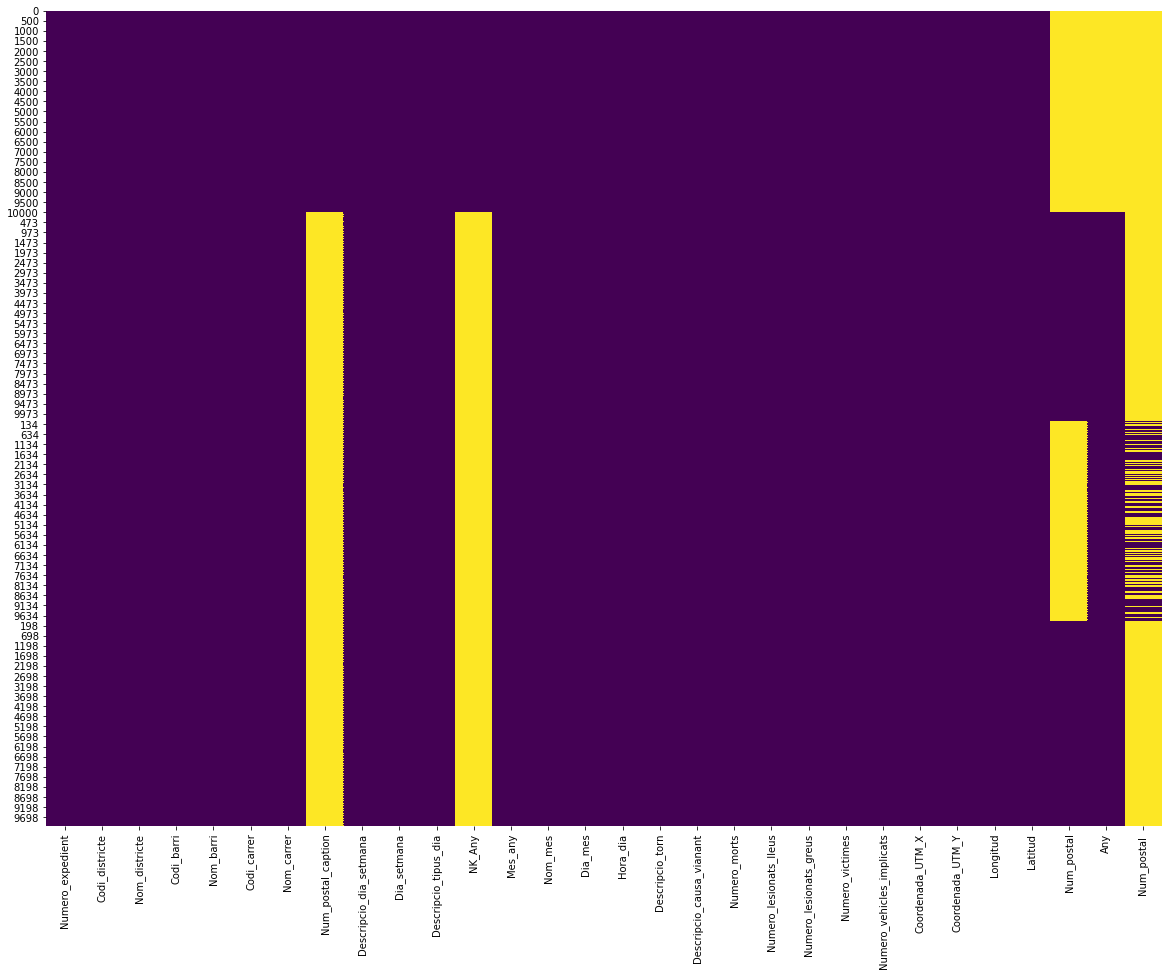

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(accidents.isnull(), cbar = False, cmap = 'viridis')

In [13]:
# In proportion of the dataset, the missing values are a logical explanation.
#1. Columns NK_Any + 'Any' need to be concated, they're splittes by 2019 year csv
#2. Num_postal is not usful for us, so we must to delete them (then, we wont conaitning NaN values)
# Let's work, first we will fill 'Any' column and after drop the useless columns.

In [14]:
accidents['Any'] = accidents['Any'].fillna(2019.0) #CSV there's a column year as NK_Any instead of Any like the other CSVs, then we fill NAN 'Any' column like 2019 (the difference)

In [15]:
#pass to float as much as possible
accidents = pass_float(accidents)

In [16]:
#WE START TO DROP COLUMNS USELESS: all the objects types that we don't need in the future and the NaN's useless like Num_postal_caption,...
accidents_class_str = get_columns_str(accidents)
accidents_class_str = eliminated_columns(accidents_class_str,['Numero_expedient','Nom_districte','Descripcio_dia_setmana','Descripcio_causa_vianant','Descripcio_tipus_dia','Descripcio_torn'])
print(accidents_class_str)

['Numero_expedient', 'Nom_districte', 'Nom_barri', 'Nom_carrer', 'Num_postal_caption', 'Descripcio_dia_setmana', 'Dia_setmana', 'Descripcio_tipus_dia', 'Nom_mes', 'Descripcio_torn', 'Descripcio_causa_vianant', 'Coordenada_UTM_X', 'Coordenada_UTM_Y', 'Num_postal', 'Num_postal ']
['Nom_barri', 'Nom_carrer', 'Num_postal_caption', 'Dia_setmana', 'Nom_mes', 'Coordenada_UTM_X', 'Coordenada_UTM_Y', 'Num_postal', 'Num_postal ']


In [17]:
accidents_clean = accidents.drop(columns = accidents_class_str, axis=1) #bye useless columns

In [18]:
accidents_clean.drop(columns = ['NK_Any', 'Codi_carrer'],axis=1,inplace=True) #we eliminate this column because we have all distirbuted in column 'Any' as we did in the before cells. Codi_barri is a column irrelevant for us.

In [19]:
accidents_clean.isna().sum()

Numero_expedient             0
Codi_districte               0
Nom_districte                0
Codi_barri                   0
Descripcio_dia_setmana       0
Descripcio_tipus_dia         0
Mes_any                      0
Dia_mes                      0
Hora_dia                     0
Descripcio_torn              0
Descripcio_causa_vianant     0
Numero_morts                 0
Numero_lesionats_lleus       0
Numero_lesionats_greus       0
Numero_victimes              0
Numero_vehicles_implicats    0
Longitud                     0
Latitud                      0
Any                          0
dtype: int64

In [20]:
#we must eliminate errors values like negatives values in codi districtic because doesn't exist a negative code district. Except for Coordinates could be.
accidents_clean['Codi_districte'].value_counts().sort_values(ascending=False)

 2.0     12104
 10.0     5024
 3.0      4417
 5.0      4339
 7.0      2858
 4.0      2805
 9.0      2476
 1.0      2257
 8.0      2136
 6.0      1959
-1.0        67
Name: Codi_districte, dtype: int64

In [21]:
accidents_clean = accidents_clean[accidents_clean[['Codi_districte','Codi_barri','Mes_any','Dia_mes','Hora_dia', 'Numero_morts','Numero_lesionats_lleus','Numero_lesionats_greus','Numero_victimes','Numero_vehicles_implicats']].ge(0).all(1)]

In [22]:
displaydf(accidents_clean)

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Descripcio_dia_setmana,Descripcio_tipus_dia,Mes_any,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_vianant,Numero_morts,Numero_lesionats_lleus,Numero_lesionats_greus,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud,Any
0,2019S000001,5.0,Sarrià-Sant Gervasi,26.0,Dimarts,Laboral,1.0,1.0,1.0,Nit,No és causa del vianant,0.0,0.0,1.0,1.0,1.0,2.155236,41.395744,2019.0
1,2019S000002,9.0,Sant Andreu,62.0,Dimarts,Laboral,1.0,1.0,4.0,Nit,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2.179990,41.425361,2019.0
2,2019S000003,10.0,Sant Martí,66.0,Dimarts,Laboral,1.0,1.0,5.0,Nit,Creuar per fora pas de vianants,0.0,1.0,0.0,1.0,1.0,2.191712,41.396887,2019.0
3,2019S000004,6.0,Gràcia,32.0,Dimarts,Laboral,1.0,1.0,8.0,Matí,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2.165429,41.408772,2019.0
4,2019S000005,2.0,Eixample,7.0,Dimarts,Laboral,1.0,1.0,12.0,Matí,No és causa del vianant,0.0,2.0,0.0,2.0,1.0,2.170440,41.394884,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,2016S004424,9.0,Sant Andreu,59.0,Dimarts,Laboral,6.0,7.0,14.0,Tarda,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2.208224,41.438003,2016.0
10136,2016S007061,9.0,Sant Andreu,59.0,Divendres,Laboral,9.0,16.0,19.0,Tarda,No és causa del vianant,0.0,1.0,0.0,1.0,3.0,2.208988,41.436216,2016.0
10137,2016S007197,9.0,Sant Andreu,59.0,Dimecres,Laboral,9.0,21.0,12.0,Matí,No és causa del vianant,0.0,2.0,0.0,2.0,2.0,2.207099,41.435077,2016.0
10138,2016S000178,9.0,Sant Andreu,59.0,Dijous,Laboral,1.0,7.0,22.0,Nit,No és causa del vianant,0.0,1.0,0.0,1.0,2.0,2.205846,41.431817,2016.0


True

In [23]:
accidents_clean.to_csv('../data/accidents_bcn_clean.csv', index=False)